<a href="https://colab.research.google.com/github/Kwangbin/Keras_Basic/blob/main/kaggle_sk_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/ml/kaggle/sk_data1/

/content/drive/MyDrive/ml/kaggle/sk_data1


In [3]:
ls

sample_submission.csv  test.csv  train.csv


In [4]:
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [6]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


id 
age : 나이 
workclass : 고용 형태 
fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자) 
education : 교육 수준 
education_num : 교육 수준 수치 
marital_status: 결혼 상태 
occupation : 업종 
relationship : 가족 관계 
race : 인종 
sex : 성별 
capital_gain : 양도 소득 
capital_loss : 양도 손실 
hours_per_week : 주당 근무 시간 
native_country : 국적 
income : 수익 (예측해야 하는 값) 
>50K : 1 
<=50K : 0 

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


csv 가 dataframe으로 올라오면 Dtype 으로 고정 되어 커진다즉 0이 한바이트가 int64로 되서 64바리트로 고정

즉, 읽어오는 데이터 타입을 고정 하여 메모리 사용 량을 줄인다

먼저 descrive로 속성 파악

In [8]:
train = pd.read_csv('train.csv')

In [9]:
# 오브젝트는 않나온다  수치데이터만 나온다
# 이상데이터 확인
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [10]:
#데이터 확인
train.sample(10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
17910,17910,33,Local-gov,55921,Assoc-voc,11,Never-married,Protective-serv,Not-in-family,White,Male,0,0,70,United-States,<=50K
21372,21372,37,Private,26898,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,12,United-States,<=50K
1938,1938,60,Federal-gov,119832,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,7298,0,40,United-States,>50K
1884,1884,32,Private,396745,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,48,United-States,>50K
7517,7517,21,State-gov,39236,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,50,United-States,<=50K
15481,15481,43,Local-gov,115603,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
2598,2598,33,Private,174789,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,50,United-States,<=50K
21308,21308,42,Private,132633,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,?,<=50K
2087,2087,54,Private,101890,HS-grad,9,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
6371,6371,38,Private,217349,Assoc-voc,11,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K


In [11]:
#이상 데이터 항목 추가확인
train.native_country.value_counts()

United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Columbia                         52
Guatemala                        52
Italy                            50
Vietnam                          50
Dominican-Republic               48
Poland                           47
Japan                            47
Taiwan                           39
Iran                             35
Haiti                            35
Portugal                         30
Nicaragua                        28
Peru                             26
Greece                      

데이터 까보면 특성이 틀림
즉 전체는 DF 인데 개별 항목은 Series

In [12]:
type(train)

pandas.core.frame.DataFrame

In [13]:
type(train.native_country)

pandas.core.series.Series

In [14]:
train['native_country']

0        United-States
1        United-States
2        United-States
3        United-States
4                    ?
             ...      
26044    United-States
26045    United-States
26046    United-States
26047    United-States
26048    United-States
Name: native_country, Length: 26049, dtype: object

train['native_country'].  힌트 않나옴
train.native_country.  힌트 나옴

In [15]:
train['native_country']

0        United-States
1        United-States
2        United-States
3        United-States
4                    ?
             ...      
26044    United-States
26045    United-States
26046    United-States
26047    United-States
26048    United-States
Name: native_country, Length: 26049, dtype: object

In [16]:
#반드시 함수뒤에 () 확인
 train.native_country(10)

IndentationError: ignored

In [17]:
train.capital_gain.describe()

count    26049.00000
mean      1087.68970
std       7388.85469
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      99999.00000
Name: capital_gain, dtype: float64

In [18]:
train.capital_gain.describe(percentiles=[.99])

count    26049.00000
mean      1087.68970
std       7388.85469
min          0.00000
50%          0.00000
99%      15024.00000
max      99999.00000
Name: capital_gain, dtype: float64

In [19]:
#직접 이상치 확인
# train.capital_gain에 값이 99999인것을 찾아라
# : 전체 표시하라
train.loc[train.capital_gain == 99999, :]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
227,227,24,?,151153,Some-college,10,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,99999,0,50,South,>50K
430,430,55,Private,408537,9th,5,Divorced,Craft-repair,Unmarried,White,Female,99999,0,37,United-States,>50K
848,848,32,Private,330715,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
852,852,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
1209,1209,37,Local-gov,287306,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Wife,Black,Female,99999,0,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25535,25535,55,Private,197399,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
25648,25648,64,Self-emp-inc,185912,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,35,United-States,>50K
25705,25705,41,Private,115932,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
25824,25824,50,Self-emp-not-inc,132716,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K


In [20]:
train.capital_gain < 99999

0        True
1        True
2        True
3        True
4        True
         ... 
26044    True
26045    True
26046    True
26047    True
26048    True
Name: capital_gain, Length: 26049, dtype: bool

In [21]:
#iloc 는 loc와 틀리게 숫자로 해야 한다
# 인덱스 번호가 이름이 아니라 숫자번호로 써라


In [22]:
train.loc[train.race =='White', :]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
6,6,43,State-gov,206139,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26042,26042,48,Self-emp-not-inc,191389,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,50,United-States,<=50K
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


In [23]:
train.income

0         >50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
26044    <=50K
26045    <=50K
26046    <=50K
26047    <=50K
26048    <=50K
Name: income, Length: 26049, dtype: object

In [24]:
train.income.map

<bound method Series.map of 0         >50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
26044    <=50K
26045    <=50K
26046    <=50K
26047    <=50K
26048    <=50K
Name: income, Length: 26049, dtype: object>

In [25]:
train.income.map(lambda x: x =='>50K')

0         True
1        False
2        False
3        False
4        False
         ...  
26044    False
26045    False
26046    False
26047    False
26048    False
Name: income, Length: 26049, dtype: bool

In [26]:
train.income.map(lambda x: int(x =='>50K'))

0        1
1        0
2        0
3        0
4        0
        ..
26044    0
26045    0
26046    0
26047    0
26048    0
Name: income, Length: 26049, dtype: int64

In [27]:
train.apply

<bound method DataFrame.apply of           id  age         workclass  ...  hours_per_week native_country  income
0          0   40           Private  ...              60  United-States    >50K
1          1   17           Private  ...              20  United-States   <=50K
2          2   18           Private  ...              16  United-States   <=50K
3          3   21           Private  ...              25  United-States   <=50K
4          4   24           Private  ...              20              ?   <=50K
...      ...  ...               ...  ...             ...            ...     ...
26044  26044   57           Private  ...              52  United-States   <=50K
26045  26045   23           Private  ...              40  United-States   <=50K
26046  26046   78                 ?  ...              15  United-States   <=50K
26047  26047   26  Self-emp-not-inc  ...              40  United-States   <=50K
26048  26048   20                 ?  ...              30  United-States   <=50K

[26049

In [28]:
train.shape

(26049, 16)

In [29]:
train[train.apply(lambda x: "?" in list(x), axis=1)]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,<=50K
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,<=50K
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,<=50K
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,<=50K
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


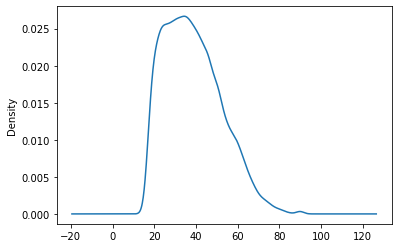

In [30]:
#걍 판다스의 plot을 써라
#간단하게 그리기
train.age.plot(kind="kde")

2.결측치 처리

In [31]:
#  행에   ? 가 하나만 있면 True
# 축
# apply , lamda 숙지 하기
#https://koreadatascientist.tistory.com/115
train.apply(lambda x: "?" in list(x), axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
26044    False
26045    False
26046     True
26047    False
26048     True
Length: 26049, dtype: bool

In [32]:
# ? 찾기
#train.loc[train.apply(lambda x: "?" in list(x), axis=1),:]

train[train.apply(lambda x: "?" in list(x), axis=1)]


,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,<=50K
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,<=50K
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,<=50K
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,<=50K
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


In [33]:
train.occupation.value_counts()

Prof-specialty       3304
Craft-repair         3262
Exec-managerial      3246
Sales                2998
Adm-clerical         2983
Other-service        2626
Machine-op-inspct    1582
?                    1508
Transport-moving     1270
Handlers-cleaners    1092
Farming-fishing       784
Tech-support          742
Protective-serv       522
Priv-house-serv       123
Armed-Forces            7
Name: occupation, dtype: int64

In [34]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

결측치 처리
삭제? 대치?

In [35]:
# && 가 아니라 &임
# 비트연산에서 T,F 하나씩 비교 할려면 &가 하나여야 한다.
# ?가 양쪽인거 찾기
train[(train['workclass'] == '?')&(train['occupation'] == '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,<=50K
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,<=50K
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,<=50K
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,<=50K
67,67,65,?,404601,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,2414,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,<=50K
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


In [36]:
train.loc[(train.age >= 30)&(train.workclass=='?'), 'workclass'] = 'No'

In [37]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
State-gov            1043
Self-emp-inc          877
No                    868
Federal-gov           765
?                     634
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [38]:
train.native_country.value_counts()

United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Columbia                         52
Guatemala                        52
Italy                            50
Vietnam                          50
Dominican-Republic               48
Poland                           47
Japan                            47
Taiwan                           39
Iran                             35
Haiti                            35
Portugal                         30
Nicaragua                        28
Peru                             26
Greece                      

Null check 관련 팁
데이터를 일일이 다 확인하지 않고 결측치가 있는지 확인하는 방법은?

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


2.2 이상치 처리
수치형 데이터에 이상한 값이 없는지 한번 확인해보도록 하겠습니다.

In [40]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [41]:
train.loc[train.capital_gain < 99999].sort_values('capital_gain', ascending=False)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
13280,13280,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,<=50K
12625,12625,19,Private,188815,HS-grad,9,Never-married,Other-service,Own-child,White,Female,34095,0,20,United-States,<=50K
2893,2893,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
17707,17707,20,?,273701,Some-college,10,Never-married,?,Other-relative,Black,Male,34095,0,10,United-States,<=50K
4703,4703,55,Self-emp-not-inc,145574,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,34095,0,60,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,9047,48,Private,180446,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
9046,9046,28,Private,273269,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,<=50K
9045,9045,36,Self-emp-not-inc,34180,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,70,United-States,>50K
9044,9044,23,?,283806,9th,5,Divorced,?,Not-in-family,White,Female,0,0,35,United-States,<=50K
